# ESCUELA COLOMBIANA DE INGENIERÍA
# PRINCIPIOS Y TECNOLOGÍAS IA 2026-1
## ARBOLES DE DECISIÓN
## LABORATORIO 1/4

**OBJETIVOS**

Desarrollar competencias básicas para:
1. Modelar y resolver problemas usando árboles de decisión
2. Implementar árboles de decisión
3. Apropiar un framework para árboles de decisión (*scikit-learn*)
4. Conocer una librería para procesamiento de datos simbólicos (*python pandas DataFrame*)

**ENTREGABLE**


*Reglas para el envío de los entregables*:

* **Forma de envío:**
Este laboratorio se debe enviar únicamente a través de la plataforma Moodle en la actividad definida. Se tendrán dos entregas: inicial y final.

* **Formato de los archivos:**
Incluyan en un archivo *.zip* los archivos correspondientes al laboratorio.

* **Nomenclatura para nombrar los archivos:**
El archivo deberá ser renombrado, “DT-lab-” seguido por los usuarios institucionales de los autores ordenados alfabéticamente (por ejemplo, se debe adicionar pedroperez al nombre del archivo, si el correo electrónico de Pedro Pérez es pedro.perez@mail.escuelaing.edu.co)




# **PARTE I. IMPLEMENTACIÓN DE ÁRBOLES DE DECISIÓN**
Para este apartado se van a implementar un árbol de decisión, en este caso usando como medida la entropia.

*La idea de los árboles de decisión fue desarrollada paulatinamiente. El pionero más reconocido es Ross Quinlan, quien propuso en 1986 el algoritmo ID3 (Iterative Dichotomiser 3) en el artículo [Induction of decision trees](https://link.springer.com/article/10.1007/BF00116251). Este algoritmo marcó un hito en la construcción automática de árboles de decisión a partir de datos.*

## I.A. IMPLEMENTACIÓN DE UN ÁRBOL DE DECISIÓN

Implementar un árbol de decisión; calculando una salida $\check{Y} (Yp)$ para unas entradas $X$.

**Propiedades:**

*   Tarea: **Clasificación binaria**
*   Características: **Categóricas**
*   Criterio de selección: **Ganancia de información**
*   Métrica para evaluación : **F1 SCORE**

<div>
<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/09/Precision-vs-Recall-in-Machine-Learning.webp" width="350"/>
</div>

> **Formulas**

*   Impureza : **Entropía: H**

*   Ganancia de información: **IG(D,A)**

*   Impureza de Arbol: **Impurity(V\*)**







## Paso 1. Criterios de selección de atributos
Las impurezas en árboles de decision miden cuán homogéneas o heterogéneas son las clases dentro de un conjunto de datos ***en un nodo del árbol***. La métrica de impureza determina cómo dividir los datos en cada nodo.
Los principales métodos de evaluación de impureza son: **entropía** e **indice gini**.

*Incluyan las formulas de los dos criterios de selección y comparelos considerando criterios como sensibilidad al desbalance de clases y eficiencia computacional*

---
**Entropia:**


---
**Gini**


---
**Comparación**


## Paso 2. Ganancia de una característica e impureza del árbol
Los otros dos conceptos de fundamentan los árboles de decisión son la **ganancia de información** y la **impureza *de un arbol***.

*Expliquen su proposito y la fórmula correspondiente, detallandola.*

---
**Ganancia:**


---
**Impureza**



## Paso 3. Implementación del código base para un árbol de decisión

### Librería necesaria

In [ ]:
import pandas as pd
from abc import ABC, abstractmethod

### Funciones base: métrica y criterio

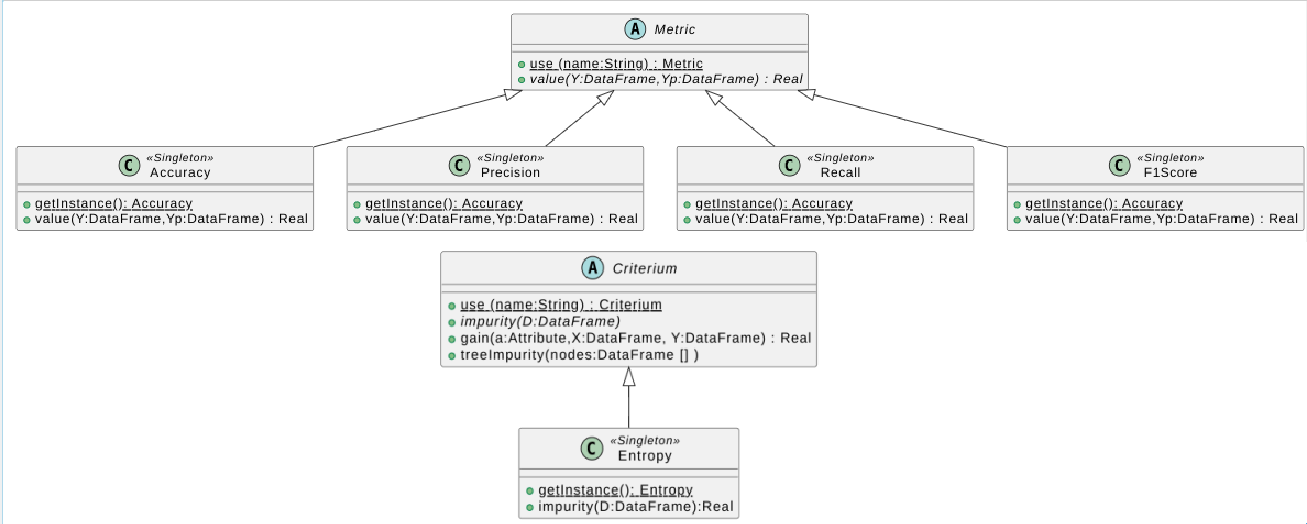

###Métrica

In [ ]:
class Metric(ABC):
  """ Abstracta: define entradas, salidas y el comportamiento inicial de los métodos clave para cualquier metrica
  Representa una metrica de desempeño P para evaluar una tarea T
  """
  @classmethod
  def use(cls,name: str):
    """ obtiene metrica (OBJ) a partir del nombre
    Args:
      name  : nombre esperado de la metrica
    Returns:
       objeto metrica
    """
    pass

  def value(self, Y: pd.DataFrame, Yp: pd.DataFrame)->float:
    """ computa el desempeño P
    Args:
      Y   s de salidas esperadas (etiquetadas)
      Yp  : valores de salidas obtenidas
    Return:
      valor del desempeño
    """
    pass

In [ ]:
# Documentar los métodos implementados
class Accuracy(Metric):
  """ Metrica de exactitud (acertados / totales). Implementa Metric
  """
  def __new__(cls):
    pass

  def value(self, Y: pd.DataFrame, Yp: pd.DataFrame)->float:
    pass

In [ ]:
# Documentar los métodos implementados
class Precision(Metric):
  """ Metrica de precision). Implementa Metric
  """
  def __new__(cls):
    pass

  def value(self, Y: pd.DataFrame, Yp: pd.DataFrame)->float:
    pass

In [ ]:
# Documentar los métodos implementados
class Recall(Metric):
  """ Metrica de exhaustividad. Implementa Metric
  """
  def __new__(cls):
    pass

  def value(self, Y: pd.DataFrame, Yp: pd.DataFrame)->float:
    pass

In [ ]:
# Documentar los métodos implementados
class F1Score(Metric):
  """ Metrica de media armónica entre Precisión y Exhaustividad. Implementa Metric
  """
  def __new__(cls):
    pass

  def value(self, Y: pd.DataFrame, Yp: pd.DataFrame)->float:
    pass

In [ ]:
# Adicione los casos de prueba de los métodos implementados

###Criterio

In [ ]:
class Criterium(ABC):
  """ Abstracta: Define el criterio para seleccionar y dar prioridad a los atributos
  Representa la impureza
  """
  @classmethod
  def use(cls, name: str):
    """ obtiene criterio de selección (OBJ) a partir del nombre
    Args:
      name  : nombre esperado del criterio
    Returns:
      objeto criterio de selección
    """
    pass

  def impurity(self, V: pd.DataFrame) -> float:
    """ computa la impureza en un nodo/vértice
    Args:
      V    : ejemplares para una característica
    Returns:
       valor de la impureza del nodo
    """
    pass

  def gain(self, a: str, X: pd.DataFrame, Y: [pd.DataFrame]) -> float:
    """ computa la ganancia de información de un nodo con 1 o más hijos
    Args:
      a  : atributo/característica a evaluar
      X : ejemplares / valores de entrada
      Y : valores de salida esperados
    Returns:
      valor de la ganancia de información
    """
    pass

  def treeImpurity(self, nodes: [pd.DataFrame]) -> float:
    """ computa la impureza de todo un arbol
    Args:
      nodes    : datos de cada uno de los nodos del arbol
    Returns:
      valor de la impureza del arbol
    """
    pass

In [ ]:
# Documentar los métodos implementados
class Entropy(Criterium):
  """ Criterio de selección - impureza por entropia
  """
  def __new__(cls):
    pass

  def impurity(self, V: pd.DataFrame) -> float:
    pass

  def gain(self, a: str, X: pd.DataFrame, Y: pd.DataFrame) -> float:
    pass

  def treeImpurity(self, nodes: pd.DataFrame) -> float:
    pass

In [ ]:
# Adicione los casos de prueba de los métodos implementados

### Árbol de decisión
Para la implementación sigan las decisiones de diseño presentadas en el diagrama de clases. Pueden incluir los métodos y clases adicionales que requieran.

####Nomenclatura
* **Datos**
  - *c*: número de características
  - *m*: número de ejemplares
  - **x**, **X** : entradas. Un ejemplo (1xc) o todos los ejemplos (mxc)
  - **y**, **Y** : salidas reales. Un ejemplo (1xc) o todos los ejemplos(mxc)
  - **yp**, **Yp** : salidas estimadas. Un ejemplo (1xc) o todos los ejemplos(cxm)


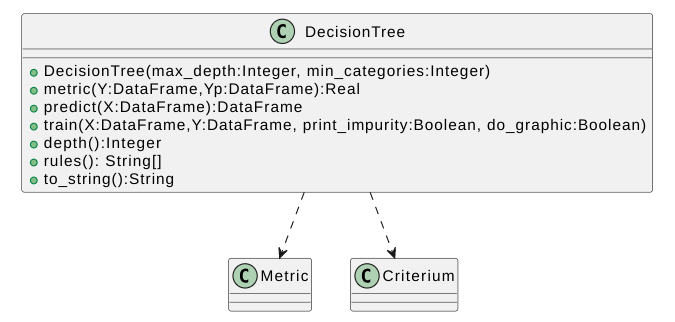

In [ ]:
class DecisionTree:
  """ Representa un árbol de decisión
  """
  def __init__(self, max_depth: int, min_categories: int):
    """ inicializar la clase de árbol de decisión.
    Args:
      max_depth   : Profundidad máxima del árbol de decisión
      min_categories   : Número mínimo de categorias para dividir un nodo
    """
    pass

  def metric(self, Y: pd.DataFrame, Yp: pd.DataFrame) -> float:
    """ computa la metrica del modelo a partir de los ejemplares comparando las salidas
    Args:
      Y  : valores de salidas esperadas (etiquetadas)
      Yp  : valores de salidas obtenidas
    Return:
       desempeño del modelo para ejemplares
    """
    pass

  def predict(self, X: pd.DataFrame) -> pd.DataFrame:
    """ computa una serie de entradas a traves del arbol generando una predicción
    Args:
      X    : valores de características (entradas)
    Return:
     valores de salidas obtenidas
    """
    pass

  def train(self, X: pd.DataFrame, Y: pd.DataFrame, print_impurity: bool, do_graphic: bool):
    """ construye y entrena el árbol de decisión a partir de unos ejemplares.
    Args:
      X  : valores de características - conjunto de entrenamiento
      Y  : valores de salidas esperadas - conjunto de entrenamiento
      print_impurity : mostrar la impureza del arbol por iteración
      do_graphic: graficar las impurezas por iteración
    """
    pass

  def depth()->int:
    """ consulta la profundidad del árbol
    Return:
      profundidad del árbol
    """
    pass

  def rules() -> [str]:
    """ consultar las reglas del árbol
    Return:
      reglas del árbol de decisión
    """
    pass

  def to_string() -> str:
    """ consultar la estructura del arbol
    Return:
      estructura del árbol
    """
    pass

In [ ]:
# Como primer caso de prueba entrene un árbol para calcular el operador lógico and. Explique los resultados.

In [ ]:
# Como segundo caso de prueba entrene un árbol para calcular el operador lógico or. Explique los resultados.

In [ ]:
# Como tercer caso de prueba entrene un árbol para calcular el operador lógico xor. Explique los resultados.

In [ ]:
# Como último caso de prueba entrene un árbol para el dataset propuesto por su profesor. Use 80% para entrenamiento y 20% para pruebas. Explique los resultado.

# **PARTE II. USO DE FRAMEWORK PARA ARBOLES DE DECISIÓN**

Para este apartado se va a hacer uso de una librería que brinda de manera simplificada un entrenamiento flexible de distintos algoritmos basados en árboles de deciisón. En este caso será **scikit-learn**

**scikit-learn** es una biblioteca de Python que facilita la implementación de algoritmos de aprendizaje automático. Es ampliamente usada en la industria por su simplicidad, buena documentación y eficiencia.

**scikit-learn** ofrece diferentes estrategias de aprendizaje basadas en árboles; entre ellas las que exploraremos en este laboratorio.
- [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
- [RandomForestClassifier](https://scikit-learn.org/stable/search.html?q=RandomForestClassifier)
- [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

---
Resuelvan un problema de clasificación usando el *dataset* definido por su profesor. (70% entrenamiento, 10% validación y 20% pruebas)

##Paso 1: Definir el problema
Antes de desarrollar un modelo, es fundamental establecer qué se quiere lograr y cómo se medirá el éxito. Esto implica explicar el problema, elegir una métrica adecuada (f1_score) y establecer un umbral de desempeño.


*Incluyan la respuesta*

##Paso 2: Explorar y preparar los datos
Para comprender la naturaleza de los datos que estamos utilizando es necesario **explorar** el *dataset* con visualizaciones adecuadas que permitan conocer la distribución de clases o valores, la presencia de valores nulos o atípicos y las correlaciones entre variables.

**Preparar** los datos para que la red pueda aprender de manera eficiente implica, cuando se requiera, la limpieza de datos, la normalización o estandarización de valores, la codificación de variables categóricas y la separación en conjuntos de entrenamiento (train), validación (dev) y prueba (test).

In [ ]:
#Analizar los datos

*Incluyan observaciones*

In [ ]:
#Preparar los datos separandolos en entrenamiento, validación y pruebas.

##Paso 3: Desarrollar el modelo
La estrategia que vamos a seguir es desarrollar tres modelos diferentes y escoger entre ellos el mejor modelo para probarlo.
- Los tres modelos se entrenan con *train*
- El mejor modelo se selecciona con *dev*
- El modelo seleccionado se prueba con *test*

###Paso 3.1: Entrenar los modelos candidatos

#### Paso 3.1.1: Entrenar un árbol de decisión

1. Se crea una instancia de la clase `DecisionTreeClassifier`
2. Se entrena (`.fit(X,y)`)
3. Se consulta la métrica f1 (`.predict(X)` y `f1_score(Y, Y_p)`)


In [ ]:
# Entrenar un árbol de decisión

#### Paso 3.1.2: Entrenar un bosque aleatorio

1. Se crea una instancia de la clase `RandomForestClassifier`
2. Se entrena (`.fit(X,y)`)
3. Se consulta la métrica f1 (`.predict(X)` y `f1_score(Y, Y_p)`)

In [ ]:
#Entrenar un bosque aleatorio

#### Paso 3.1.3: Entrenar un bosque con potenciación de gradiente
1. Se crea una instancia de la clase `GradientBoostingClassifier`
2. Se entrena (`.fit(X,y)`)
3. Se consulta la métrica f1 (`.predict(X)` y `f1_score(Y, Y_p)`)

In [ ]:
#Entrenar el bosque con potenciación de gradiente

### Paso 3.2: Seleccionar el mejor modelo

Para seleccionar el modelo se usa el conjunto de datos de validación.

1. Se consulta la métrica f1 de cada uno de los modelos (.predict(X) y f1_score(Y, Y_p))

###Paso 3.3: Probar el modelo seleccionado
Ya seleccionado el modelo con el conjunto de datos de validación, se puede probar su rendimiento con los datos de prueba.
1. Se consulta la métrica f1 del modelo (.predict(X) y f1_score(Y, Y_p))

In [ ]:
#Evaluar el modelo

##Paso 4: Redactar conclusiones

*Incluyan las conclusiones*
- Comparen los resultados de entrenamiento de los tres modelos incluyendo datos como: altura, impureza, exactitud y número de reglas. Presenten tabla y expliquen los datos. Indiquen el modelo que escogerían en este punto del proceso justificando la respuesta.
- Comparen los resultados de validación de los tres modelos incluyendo:
exactitud en entrenamiento y exactitud en validación. Expliquen en terminos de sesgo y varianza.
- Presenten los resultados logrados con el modelo seleccionado. Enumeren los hallazgos.

## RETROSPECTIVA

**1.** ¿Cuál fue el tiempo total invertido en el laboratorio por cada uno de ustedes? (Horas/Hombre)

**2.** ¿Cuál es el estado actual del laboratorio? ¿Por qué?

**3.** ¿Cuál consideran fue el mayor logro? ¿Por qué?

**4.** ¿Cuál consideran que fue el mayor problema técnico? ¿Qué hicieron para resolverlo?

**5.** ¿Qué hicieron bien como equipo? ¿Qué se comprometen a hacer para mejorar los resultados?

**6**.¿Qué referencias usaron? ¿Cuál fue la más útil? Incluya citas con los estándares adecuados.

*Incluyan las respuesta*